In [4]:
import matplotlib.pyplot as plt

from PIL import Image

from ssd import SSD

import numpy as np

import cv2

In [8]:
ssd = SSD(model_path='logs/ep046-loss4.282-val_loss3.554.h5', classes_path='model_data/NEU_classes.txt', confidence=0.5)

logs/ep046-loss4.282-val_loss3.554.h5 model, anchors, and classes loaded.


b'crazing 0.56' 67 24 126 181


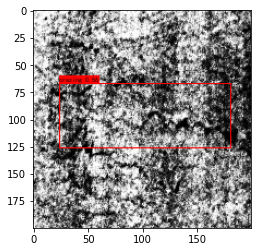

In [54]:
# image = Image.open('E:\\MobileNet\\ssd_keras\\img\\test4.jpg')
# image = Image.open('F:\\GTSDB\\new_set\\val_images\\111.jpg')
image = Image.open('F:\\NEU-DET\\IMAGES\\crazing_118.jpg')
image = np.asarray(image)
grayImage = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
grayImage = cv2.equalizeHist(grayImage)
grayImage = cv2.cvtColor(grayImage, cv2.COLOR_GRAY2RGB)
image = Image.fromarray(grayImage)
# image = Image.open('F:\\VOC2012\\JPEGImages\\2012_004312.jpg')
# image = Image.open('F:\\GTSDB\\ppmImages\\00033.ppm')

r_image = ssd.detect_image(image)

plt.imshow(r_image)

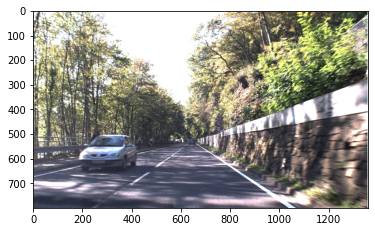

In [22]:
image = Image.open('F:\\GTSDB\\ppmImages\\00003.ppm')

plt.imshow(image)


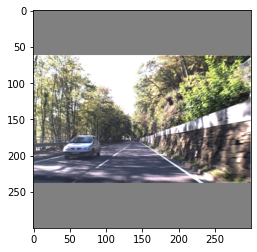

In [23]:
# image = image.resize((300, 300))

w = 300
iw = 1360
h = 300
ih = 800

scale = min(w/iw, h/ih)
nw = int(iw*scale)
nh = int(ih*scale)
dx = (w-nw)//2
dy = (h-nh)//2

#---------------------------------#
#   将图像多余的部分加上灰条
#---------------------------------#
image       = image.resize((nw,nh), Image.BICUBIC)
new_image   = Image.new('RGB', (w,h), (128,128,128))
new_image.paste(image, (dx, dy))
image_data  = np.array(new_image, np.float32)
plt.imshow(new_image)